# Preamble

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [1]:
titanic = pd.read_csv('Titanic.csv')
titanic

NameError: name 'pd' is not defined

# Ready datasets

First clean up the data a little

In [ ]:
#one-hot encode categorical features
male_column = pd.get_dummies(titanic["Sex"])[['male']]
embark_columns = pd.get_dummies(titanic["Embarked"])

#replace categorical features with new features
titanic = pd.concat([titanic, male_column, embark_columns], axis='columns').drop(['Sex', 'Embarked'], axis='columns')

#drop non-categorical text features
titanic = titanic.drop(['Name', 'Ticket', 'Cabin', 'PassengerId', 'Fare'], axis='columns')

#drop data with NaN values
titanic = titanic.dropna()

titanic.columns.to_numpy()

array(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'male', 'C', 'Q',
       'S'], dtype=object)

Train and test sets

In [ ]:
y = titanic['Survived']
X = titanic.drop('Survived', axis='columns')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=504)


# Training a model

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=200, random_state=504)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=200, random_state=504)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_hat = lr.predict(X_test)
y_hat_proba = lr.predict_proba(X_test)

cm = confusion_matrix(y_test, y_hat)
accuracy = accuracy_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)

print("Confusion Matrix:\n", cm, "\n")

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("f1-score: ", f1)


Confusion Matrix:
 [[70 10]
 [17 46]] 

Accuracy:  0.8111888111888111
Precision:  0.8214285714285714
Recall:  0.7301587301587301
f1-score:  0.773109243697479


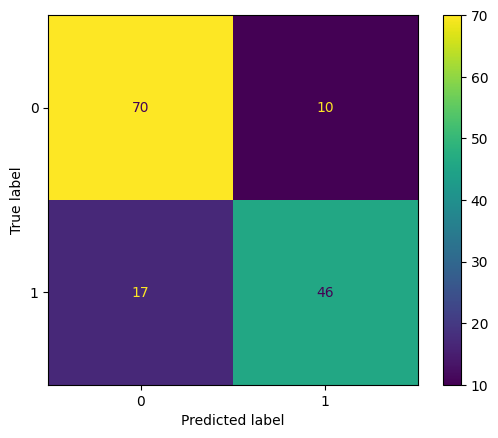

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

dis = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
dis.plot()

In [ ]:
[[TN, FP],[FN, TP]] = cm
print("Precision calculated = ", TP / (TP + FP))
print("Recall calculated = ", TP / (TP + FN))


Precision calculated =  0.8214285714285714
Recall calculated =  0.7301587301587301


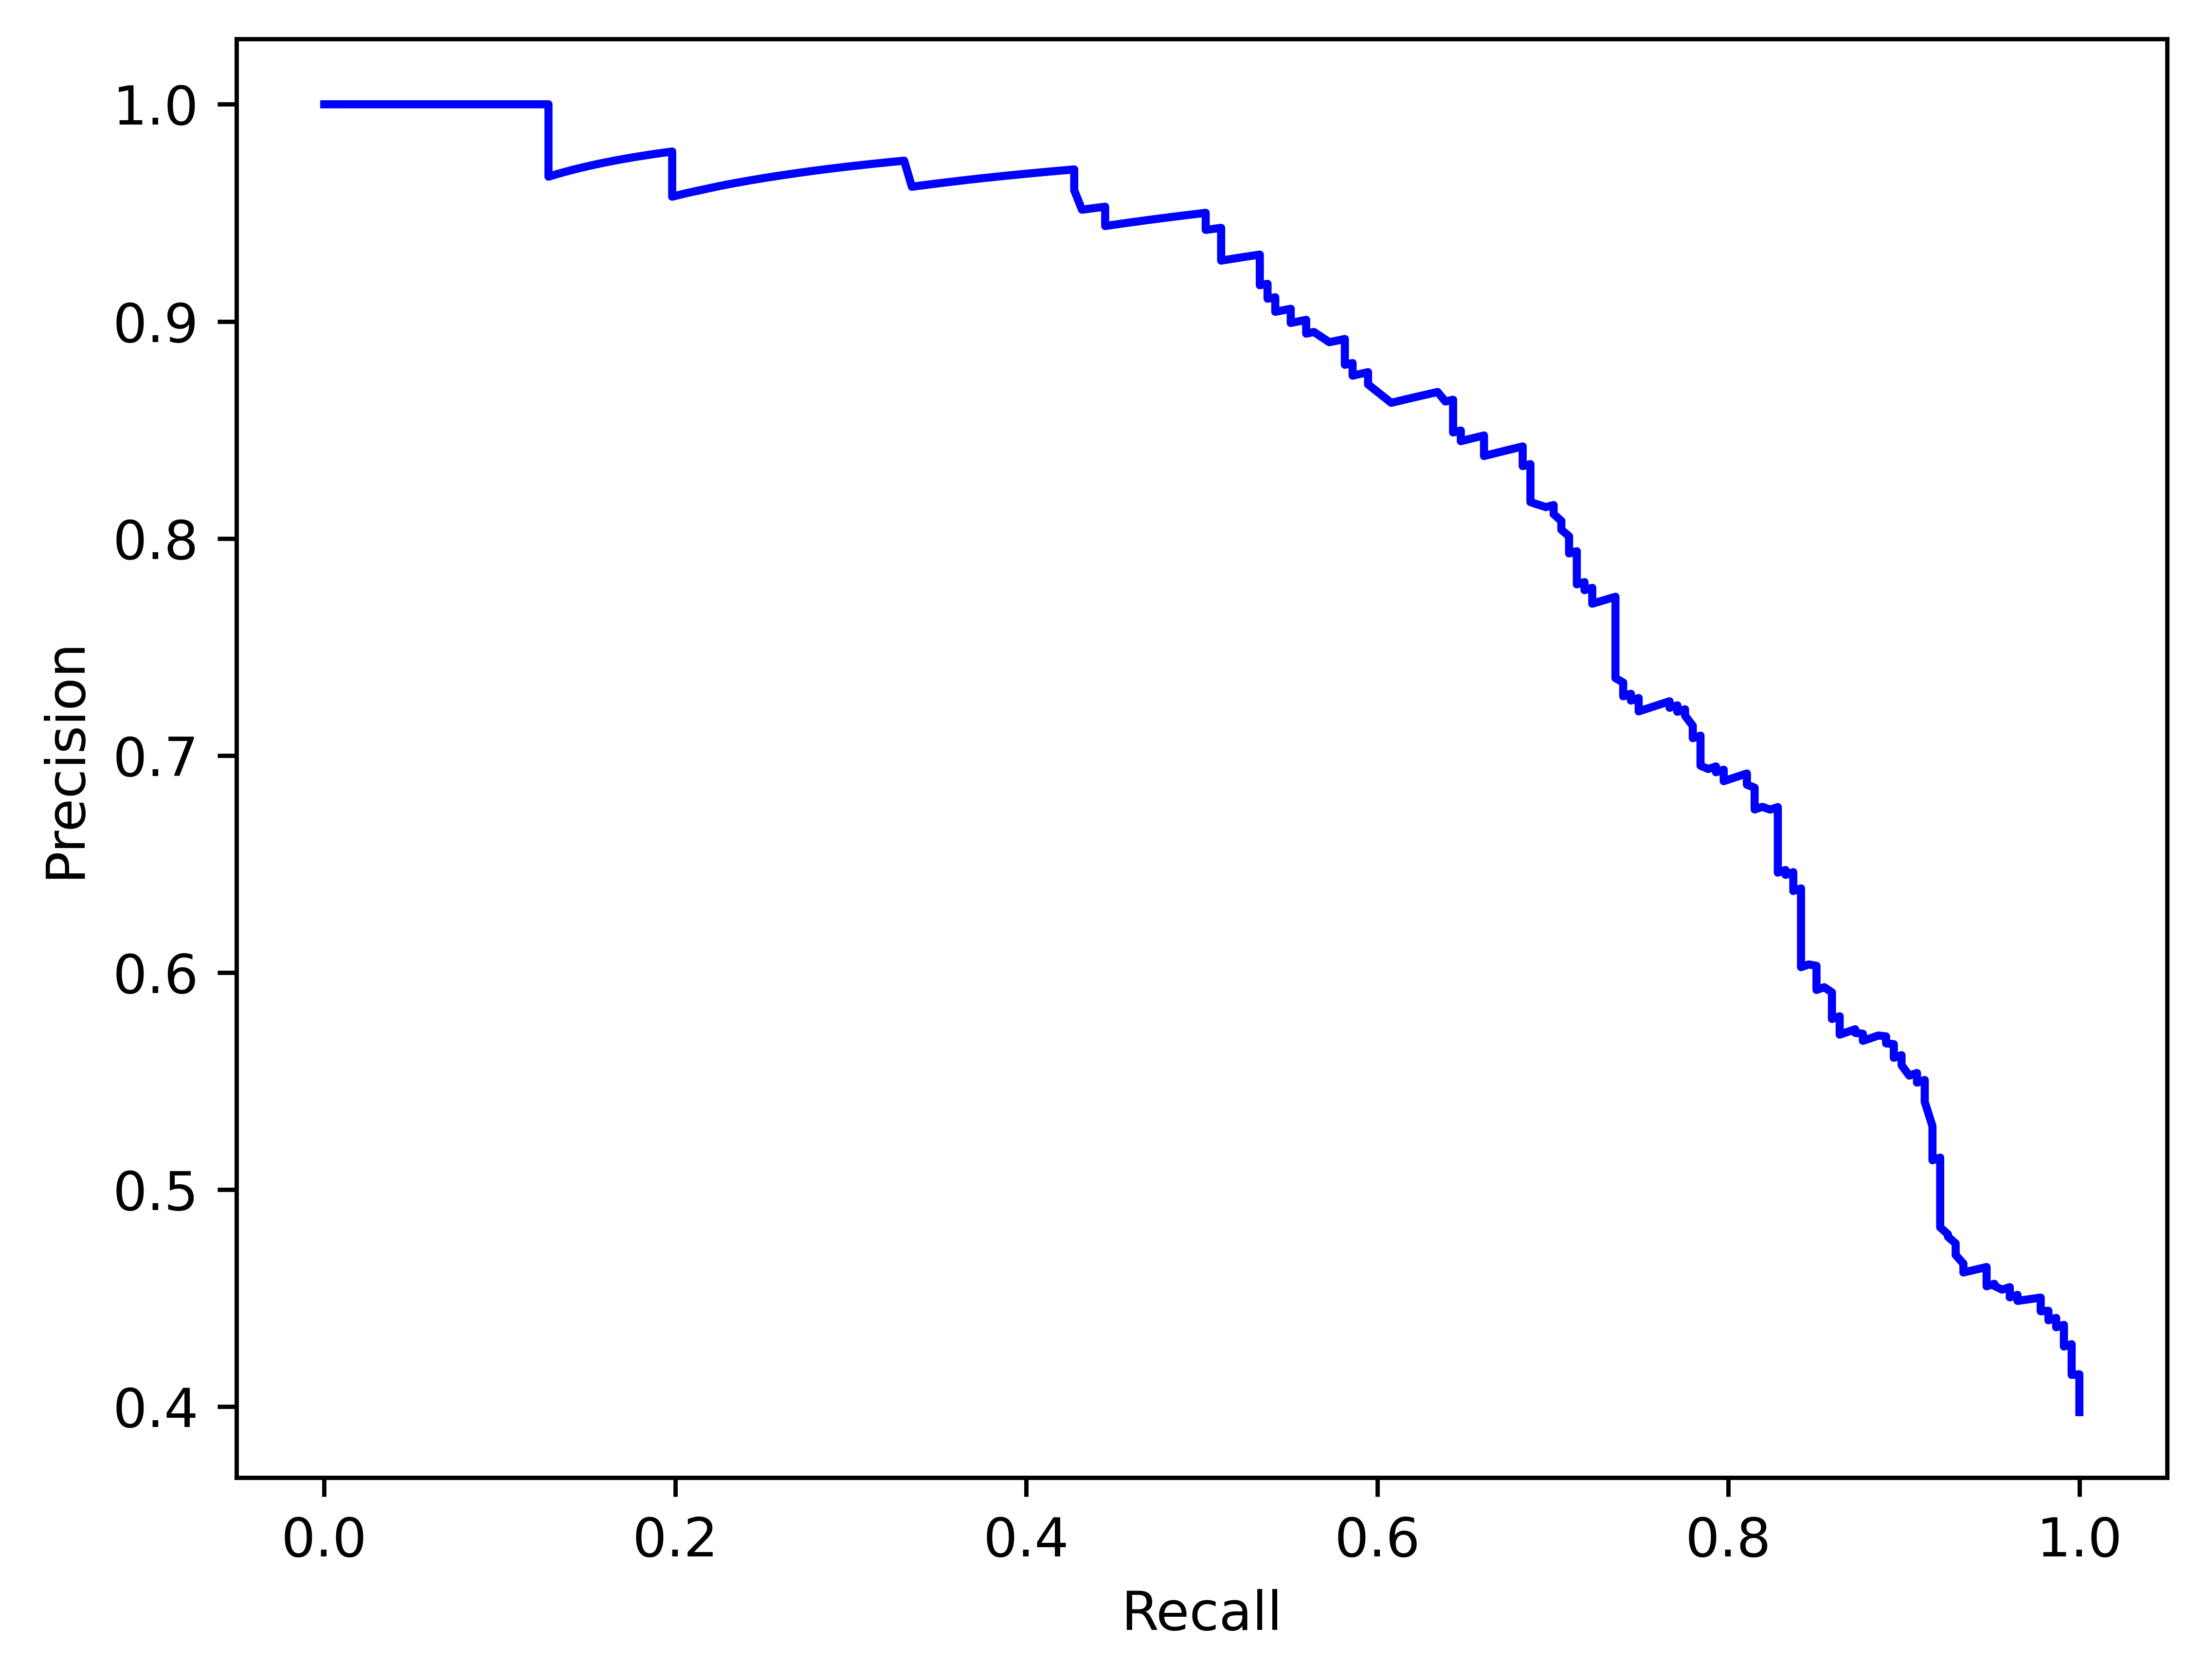

Area under curve is 0.845026.


In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# I'm using the train set here because there are too few data in test to get a good curve
prec,rec,thresholds = precision_recall_curve(y_train, lr.predict_proba(X_train)[:,1])
plt.figure(dpi=800)
plt.plot(rec,prec,'b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
print("Area under curve is {:f}.".format(auc(rec,prec)))

### Insisting on High Recall

Let's assume we are going for a recall of .95. That is, we are trying to find 95% of the survivors.

In [ ]:
# The lowest index with recall >= .95
idx_recall = (rec > .95).argmin()

# The probability threshold
prob_recall = thresholds[idx_recall]
prob_recall

0.09688820553245908

That is, we must lower the probability threshold to 9.7%

That's probably untenable

In [ ]:
y_hat_recall = y_hat_proba[:, 1] > prob_recall
print("accuracy = ", accuracy_score(y_test, y_hat_recall))
print("precision = ", precision_score(y_test, y_hat_recall))
print("recall = ", recall_score(y_test, y_hat_recall))


accuracy =  0.5874125874125874
precision =  0.5175438596491229
recall =  0.9365079365079365


### Insisting on High Precision

Let's assume we are going for a precision of .95. That is, we are trying to be 95% sure that a predicted survivor actually survived.

In [ ]:
# The lowest index with recall >= .95
idx_prec = (prec > .95).argmax()

# The probability threshold
prob_prec = thresholds[idx_prec]
prob_prec

0.7718170798307298

That is, we must raise the probability threshold to 77.2%


In [ ]:
y_hat_prec = y_hat_proba[:, 1] > prob_prec
print("accuracy = ", accuracy_score(y_test, y_hat_prec))
print("precision = ", precision_score(y_test, y_hat_prec))
print("recall = ", recall_score(y_test, y_hat_prec))


accuracy =  0.7202797202797203
precision =  0.96
recall =  0.38095238095238093
